<a href="https://colab.research.google.com/github/WLAraujo/min_dados_ufabc/blob/main/04_associacoes_simpson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Associação entre variáveis e Paradoxo de Simpson

Nesse notebook veremos formas de encontrar associações entre variáveis do mesmo tipo e de diferentes tipos e também um exemplo do paradoxo de Simpson.

# 1 - Importação dos pacotes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2 - Importação de base de dados da saúde

Vamos carregar uma base de dados no National Health and Examination Survey, uma pesquisa por amostragem feita pelo Centers of Disease Control and Preventions, uma agência dos EUA para monitoramento de saúde. Essa Base de dados é uma amostra de registros dos anos fiscais 2009/10 e 2011/12.

In [2]:
# Importação dos dados
NHANES = pd.read_csv('https://raw.githubusercontent.com/ProjectMOSAIC/NHANES/master/data-raw/NHANES.csv',index_col='ID')

In [3]:
# Amostra aleatória
NHANES.sample(10)

,SurveyYr,Gender,Age,AgeDecade,AgeMonths,Race1,Race3,Education,MaritalStatus,HHIncome,HHIncomeMid,Poverty,HomeRooms,HomeOwn,Work,Weight,Length,HeadCirc,Height,BMI,BMICatUnder20yrs,BMI_WHO,Pulse,BPSysAve,BPDiaAve,BPSys1,BPDia1,BPSys2,BPDia2,BPSys3,BPDia3,Testosterone,DirectChol,TotChol,UrineVol1,UrineFlow1,UrineVol2,UrineFlow2,Diabetes,DiabetesAge,HealthGen,DaysPhysHlthBad,DaysMentHlthBad,LittleInterest,Depressed,nPregnancies,nBabies,Age1stBaby,SleepHrsNight,SleepTrouble,PhysActive,PhysActiveDays,TVHrsDay,CompHrsDay,TVHrsDayChild,CompHrsDayChild,Alcohol12PlusYr,AlcoholDay,AlcoholYear,SmokeNow,Smoke100,Smoke100n,SmokeAge,Marijuana,AgeFirstMarij,RegularMarij,AgeRegMarij,HardDrugs,SexEver,SexAge,SexNumPartnLife,SexNumPartYear,SameSex,SexOrientation
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
56233,2009_10,female,38,30-39,466.0,Mexican,NaN,HighSchool,NeverMarried,20000-24999,22500.0,1.48,5.0,Own,Working,70.9,NaN,NaN,148.0,32.37,NaN,30.0_plus,74.0,104.0,68.0,100.0,64.0,106.0,66.0,102.0,70.0,NaN,1.22,6.15,27.0,0.262,56.0,0.602,No,NaN,Excellent,0.0,0.0,None,None,NaN,NaN,NaN,6.0,Yes,Yes,7.0,NaN,NaN,NaN,NaN,Yes,1.0,2.0,NaN,No,Non-Smoker,NaN,No,NaN,No,NaN,No,Yes,29.0,2.0,1.0,No,Heterosexual
61320,2009_10,female,4,0-9,50.0,White,NaN,NaN,NaN,45000-54999,50000.0,1.69,5.0,Own,NaN,17.2,NaN,NaN,105.1,15.57,NaN,12.0_18.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69861,2011_12,female,73,70+,NaN,Black,Black,SomeCollege,Widowed,25000-34999,30000.0,2.04,6.0,Own,NotWorking,61.1,NaN,NaN,155.7,25.20,NaN,25.0_to_29.9,60.0,134.0,64.0,142.0,62.0,134.0,64.0,134.0,64.0,7.68,1.84,5.15,25.0,0.260,182.0,0.850,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,No,No,4.0,More_4_hr,3_hr,NaN,NaN,NaN,NaN,NaN,NaN,No,Non-Smoker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66632,2011_12,male,58,50-59,NaN,White,White,9_11thGrade,Married,45000-54999,50000.0,3.47,6.0,Own,NotWorking,69.0,NaN,NaN,178.2,21.70,NaN,18.5_to_24.9,84.0,191.0,91.0,186.0,88.0,192.0,94.0,190.0,88.0,NaN,NaN,NaN,146.0,1.570,NaN,NaN,No,NaN,Good,30.0,0.0,None,None,NaN,NaN,NaN,8.0,Yes,No,NaN,More_4_hr,2_hr,NaN,NaN,Yes,7.0,364.0,Yes,Yes,Smoker,18.0,No,NaN,No,NaN,No,Yes,18.0,4.0,1.0,No,Heterosexual
71875,2011_12,male,42,40-49,NaN,Black,Black,CollegeGrad,Married,more 99999,100000.0,5.00,11.0,Own,Working,94.1,NaN,NaN,181.7,28.50,NaN,25.0_to_29.9,76.0,102.0,63.0,102.0,68.0,100.0,62.0,104.0,64.0,569.80,1.53,5.38,39.0,0.176,NaN,NaN,No,NaN,Vgood,0.0,0.0,None,None,NaN,NaN,NaN,7.0,No,Yes,NaN,2_hr,0_to_1_hr,NaN,NaN,No,1.0,4.0,NaN,No,Non-Smoker,NaN,No,NaN,No,NaN,No,Yes,16.0,10.0,1.0,No,Heterosexual
62749,2011_12,male,48,40-49,NaN,Black,Black,9_11thGrade,Married,more 99999,100000.0,5.00,13.0,Own,Working,79.8,NaN,NaN,168.9,28.00,NaN,25.0_to_29.9,60.0,130.0,69.0,130.0,74.0,126.0,72.0,134.0,66.0,271.44,1.50,4.58,187.0,4.561,NaN,NaN,No,NaN,Good,0.0,0.0,None,None,NaN,NaN,NaN,5.0,No,Yes,NaN,4_hr,0_to_1_hr,NaN,NaN,No,NaN,NaN,No,Yes,Smoker,20.0,Yes,19.0,Yes,21.0,No,Yes,15.0,80.0,1.0,No,Heterosexual
64996,2011_12,male,0,0-9,6.0,White,White,NaN,NaN,45000-54999,50000.0,2.17,5.0,Own,NaN,9.3,71.8,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67666,2011_12,female,64,60-69,NaN,Black,Black,HighSchool,Divorced,75000-99999,87500.0,5.00,5.0,Own,Working,105.3,NaN,NaN,172.4,35.40,NaN,30.0_plus,100.0,120.0,72.0,126.0,70.0,124.0,72.0,116.0,72.0,15.02,1.42,4.63,11.0,0.155,68.0,0.417,Yes,52.0,Good,0.0,0.0,None,None,3.0,1.0,NaN,6.0,No,No,NaN,3_hr,0_to_1_hr,NaN,NaN,No,NaN,0.0,NaN,No,Non-Smoker,NaN,NaN,NaN,NaN,NaN,No,Yes,23.0,4.0,NaN,No,NaN
71869,2011_12,male,69,60-69,NaN,White,White,CollegeGrad,Married,45000-54999,50000.0,2.70,9.0,Own,NotWorking,113.9,NaN,NaN,173.6,37.80,N

## 3 - Associação entre variáveis na base da saúde

### 3.1 - Categóricas X Categóricas

In [4]:
# Cruzando colunas ano da pesquisa e gênero
pd.crosstab(NHANES['SurveyYr'],NHANES['Gender'])

Gender,female,male
SurveyYr,,
2009_10,2525,2475
2011_12,2495,2505


In [5]:
# Cruzando colunas ano de gênero e idade em décadas
pd.crosstab(NHANES['Gender'],NHANES['AgeDecade'])

AgeDecade,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70+
Gender,,,,,,,,
female,653,684,681,677,681,623,480,348
male,738,690,675,661,717,681,439,239


In [6]:
# Cruzando colunas depressivo e orientação sexual
pd.crosstab(NHANES['Depressed'],NHANES['SexOrientation'])

SexOrientation,Bisexual,Heterosexual,Homosexual
Depressed,,,
Most,27,271,10
None,66,3651,48
Several,26,710,27


In [7]:
# Cruzando colunas depressivo e orientação sexual usando normalização
pd.crosstab(NHANES['Depressed'],NHANES['SexOrientation'], normalize=1)

SexOrientation,Bisexual,Heterosexual,Homosexual
Depressed,,,
Most,0.226891,0.058506,0.117647
None,0.554622,0.788212,0.564706
Several,0.218487,0.153282,0.317647


### 3.2 - Categórico X Numérico

In [8]:
# Verificando a descrição estatística dos valores de algumas categorias
# No caso a descrição de gravidezes por idade em décadas
NHANES.groupby('AgeDecade')['nPregnancies'].describe()

,count,mean,std,min,25%,50%,75%,max
AgeDecade,,,,,,,,
0-9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10-19,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20-29,276.0,2.068841,1.181204,1.0,1.0,2.0,3.0,7.0
30-39,465.0,2.894624,1.649083,1.0,2.0,3.0,4.0,11.0
40-49,520.0,3.015385,1.965932,1.0,2.0,3.0,4.0,32.0
50-59,488.0,2.940574,1.570569,1.0,2.0,3.0,4.0,10.0
60-69,401.0,3.182045,1.778841,1.0,2.0,3.0,4.0,13.0
70+,291.0,3.742268,1.915157,1.0,2.0,3.0,5.0,12.0


In [9]:
# Verificando valores únicos para quantidade de gravidezes
NHANES['nPregnancies'].unique()

array([nan,  8.,  4.,  1., 12.,  3.,  2.,  5.,  6., 11.,  7.,  9., 10.,
       32., 13.])

In [10]:
# Vendo outra descrição estatística por categoria, mas agora IMC por gênero
NHANES.groupby('Gender')['BMI'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
female,4841.0,26.772078,7.898886,12.88,21.24,25.56,31.2,81.25
male,4793.0,26.547073,6.807454,12.89,22.10,26.31,30.6,63.91


### 3.3 Númerico X Numérico

In [12]:
# Vamos usar a função de correlação sobre a nossa base
corr=NHANES.corr()
corr

,Age,AgeMonths,HHIncomeMid,Poverty,HomeRooms,Weight,Length,HeadCirc,Height,BMI,Pulse,BPSysAve,BPDiaAve,BPSys1,BPDia1,BPSys2,BPDia2,BPSys3,BPDia3,Testosterone,DirectChol,TotChol,UrineVol1,UrineFlow1,UrineVol2,UrineFlow2,DiabetesAge,DaysPhysHlthBad,DaysMentHlthBad,nPregnancies,nBabies,Age1stBaby,SleepHrsNight,PhysActiveDays,TVHrsDayChild,CompHrsDayChild,AlcoholDay,AlcoholYear,SmokeAge,AgeFirstMarij,AgeRegMarij,SexAge,SexNumPartnLife,SexNumPartYear
Age,1.000000,0.999911,0.020382,0.180783,0.028623,0.513243,0.912913,NaN,0.460179,0.407876,-0.231208,0.514129,0.228664,0.531744,0.253356,0.510618,0.228376,0.498640,0.217041,0.088036,0.102019,0.328619,-0.058705,0.032150,-0.028950,-0.124900,0.759406,0.146140,-0.032003,0.215695,0.308105,-0.001443,-0.005568,0.016638,0.058717,-0.241917,-0.251755,0.110011,0.150319,0.179321,0.222393,0.189850,0.044010,-0.113800
AgeMonths,0.999911,1.000000,0.059213,0.216559,0.040049,0.569653,0.953497,0.778540,0.480723,0.416101,-0.208861,0.475557,0.242690,0.496072,0.270580,0.470904,0.234581,0.453336,0.224728,NaN,0.084357,0.355705,-0.000659,0.082963,0.023085,-0.030342,0.755407,0.118287,-0.044254,0.231660,0.372730,-0.010353,-0.037072,0.033968,0.062366,-0.248014,-0.265827,0.113078,0.144755,0.207412,0.266383,0.243277,0.057877,-0.090753
HHIncomeMid,0.020382,0.059213,1.000000,0.895687,0.452118,0.032260,-0.002612,0.040562,0.116781,-0.063549,-0.073779,-0.068908,0.067299,-0.072148,0.065473,-0.071802,0.064399,-0.066193,0.071172,0.048987,0.114767,0.044524,0.052641,0.101766,0.032106,0.028928,-0.103365,-0.118106,-0.108776,-0.169326,-0.206228,0.374402,0.064620,0.002237,-0.165354,-0.255899,-0.136410,0.166111,0.089321,0.070264,0.072458,0.146995,-0.032429,-0.080175
Poverty,0.180783,0.216559,0.895687,1.000000,0.401718,0.104782,-0.033804,0.002751,0.173568,0.003800,-0.106365,0.001785,0.098322,0.004989,0.095296,0.000366,0.092868,-0.000759,0.099651,0.037512,0.128041,0.087386,0.051456,0.111103,0.032174,0.008241,-0.012862,-0.092542,-0.127455,-0.167472,-0.207675,0.347492,0.067288,0.020046,-0.207351,-0.267074,-0.193958,0.171479,0.088630,0.098705,0.090079,0.173629,-0.022703,-0.079212
HomeRooms,0.028623,0.040049,0.452118,0.401718,1.000000,-0.014478,0.042267,0.084187,0.013814,-0.059011,-0.007915,-0.036517,-0.038931,-0.035045,-0.026426,-0.043304,-0.038552,-0.032346,-0.035852,-0.065053,0.104031,-0.002900,-0.016614,0.016326,0.040802,0.028532,-0.100191,-0.052859,-0.080662,0.030197,0.009544,0.315387,0.067563,0.036356,-0.119527,-0.180486,-0.117288,0.093628,0.049902,0.011554,0.043927,0.069815,-0.021197,-0.042467
Weight,0.513243,0.569653,0.032260,0.104782,-0.014478,1.000000,0.921963,0.890298,0.748952,0.902185,-0.061124,0.276817,0.323340,0.278494,0.329031,0.265239,0.321689,0.277271,0.298269,0.263033,-0.325614,0.138751,0.101736,0.066490,0.023322,-0.029328,-0.104053,0.085532,0.008501,0.063353,0.018767,-0.149981,-0.061797,-0.057223,0.086526,-0.159994,0.096221,-0.062788,-0.009234,0.051882,0.042137,-0.035428,0.015027,-0.029110
Length,0.912913,0.953497,-0.002612,-0.033804,0.042267,0.921963,1.000000,0.861964,0.987283,0.066641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.076076,-0.131512,-0.182730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HeadCirc,NaN,0.778540,0.040562,0.002751,0.084187,0.890298,0.861964,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.061295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Height,0.460179,0.480723,0.116781,0.173568,0.013814,0.748952,0.987283,NaN,1.000000,0.434588,-0.183828,0.181392,0.313883,0.185972,0.322284,0.171439,0.308620,0.184802,0.292172,0.566388,-0.147209,0.089984,0.171878,0.126163,0.095190,0.001159,-0.140241,-0.026939,-0.056152,-0.098314,-0.141495,0.134840,-0.033559,-0.035819,0.043618,-0.256750,0.149388,0.155936,-0.055204,-0.006567,-0.058090,-0.041055,0.060147,0.013533
BMI,0.407876,0.416101,-0.063549,0.003800,-0.059011,0.902185,0.066641,NaN,0.434588,1.000000,0.006438,0.261743,0.245133,0.262612,0.245572,0.251514,0.243874,0.259

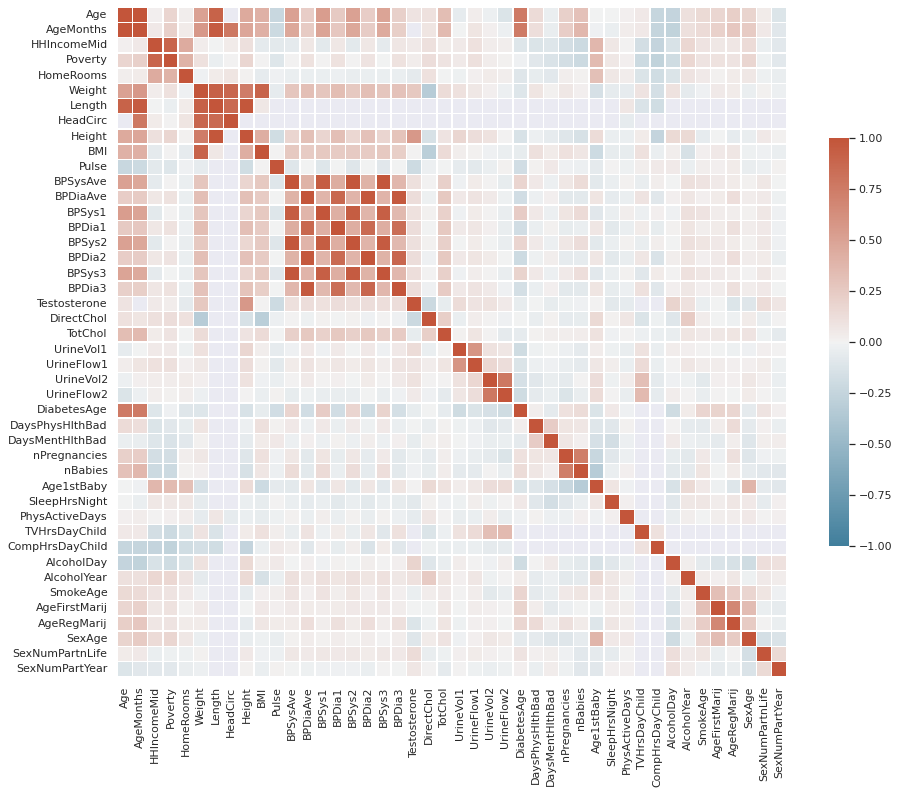

In [13]:
# Agora vamos apresentar a matriz acima de maneira mais visual com um heatmap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(corr, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

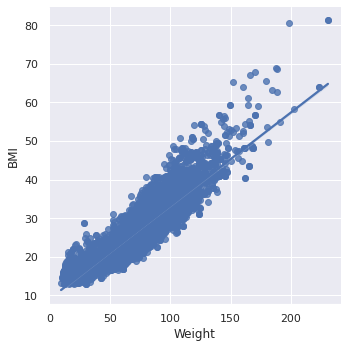

In [14]:
# Além do heatmap também podemos apresentar essa informação através de um gráfico de dispersão
# Vamos apresentar a dispersão de IMC por altura e uma linha de tendência
sns.lmplot(data=NHANES,x='Weight',y='BMI')

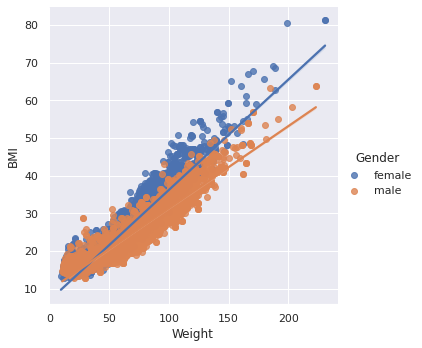

In [15]:
# Vamos apresentar um gráfico com a mesma associação acima, porém, com divisão por gênero
sns.lmplot(data=NHANES,x='Weight',y='BMI',hue='Gender')

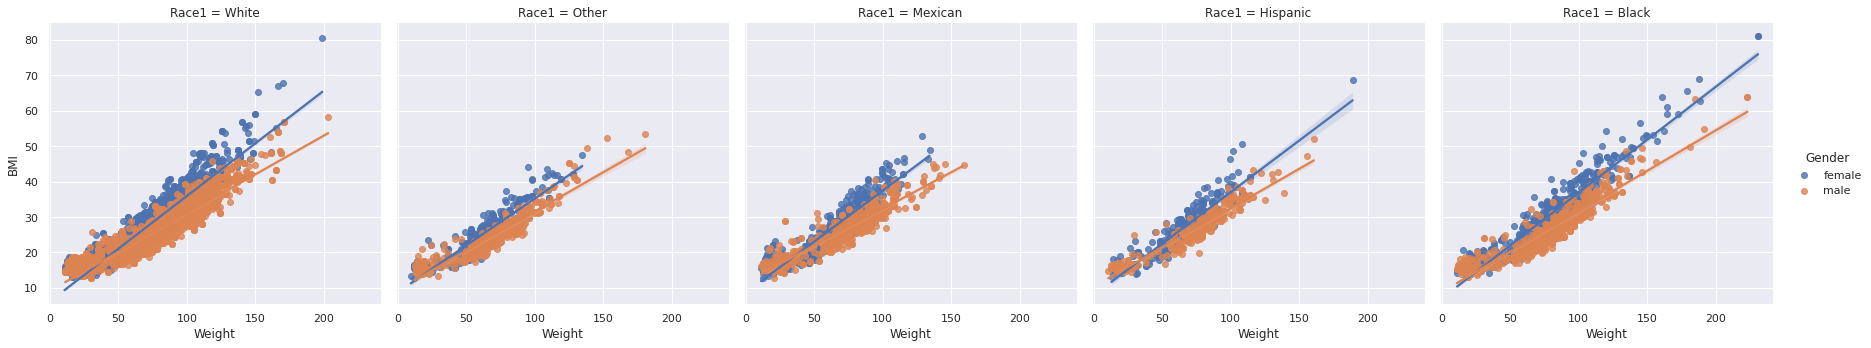

In [16]:
# Agora, além da distinção de gênero vamos nos aproveitar do multiplot para fazer divisão por raça
sns.lmplot(data=NHANES,x='Weight',y='BMI',hue='Gender',col='Race1')

# 3 - Paradoxo de Simpson


O paradoxo de Simpson é um fenômeno em probabilidade e estatística, em que uma tendência aparece em diversos grupos de dados, mas desaparece ou reverte quando esses grupos são combinados.

Para ilustrar o paradoxo de Simpson, vamos ilustrar o caso de estatísticas de COVID nos primeiros meses de infeção, comparando os países China e Itália. A base de dados a seguir contém estatística da Itália, no dia 9 de março de 2020, e da China, do dia 17 de Fevereiro de 2020.

In [28]:
# Importação e visualização da base
covid = pd.read_csv('http://professor.ufabc.edu.br/~ronaldo.prati/MineracaoDados/bases/simpson.csv',index_col=0)
covid

,Country,Date of reporting,Age group,Confirmed cases,Confirmed fatalities
0,China,17 February2020,0-9,416,0
1,China,17 February2020,10-19,549,1
2,China,17 February2020,20-29,3619,7
3,China,17 February2020,30-39,7600,18
4,China,17 February2020,40-49,8571,38
5,China,17 February2020,50-59,10008,130
6,China,17 February2020,60-69,8583,309
7,China,17 February2020,70-79,3918,312
8,China,17 February2020,80+,1408,208
9,Italy,9 March2020,0-9,43,0


In [29]:
# Agrupando os dados por país
agrupado_pais = covid.groupby('Country').sum()

In [30]:
# Criando coluna de mortalidade em percentual 
agrupado_pais['Mortality(%)'] = agrupado_pais['Confirmed fatalities']/agrupado_pais['Confirmed cases']*100

In [31]:
# Visualizando nova tabela
agrupado_pais

,Confirmed cases,Confirmed fatalities,Mortality(%)
Country,,,
China,44672,1023,2.290025
Italy,8026,357,4.448044


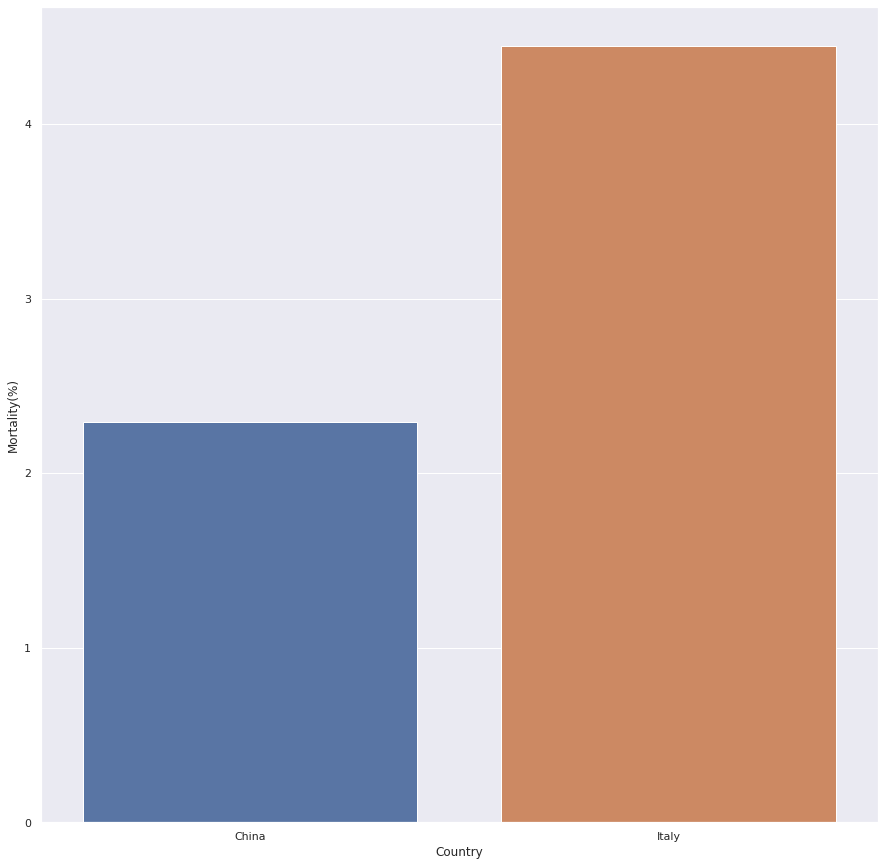

In [33]:
# Veja a mortalidade agrupada por país
sns.barplot(data=agrupado_pais,x=agrupado_pais.index,y='Mortality(%)')

Veja que a taxa de mortalidade na Itália é maior que na China. Agora vamos separar esse agrupamento por faixa etária.

In [34]:
# Calculando mortalidade para as faixas etárias da tabela original
covid['Mortality(%)'] = covid['Confirmed fatalities']/covid['Confirmed cases'] * 100

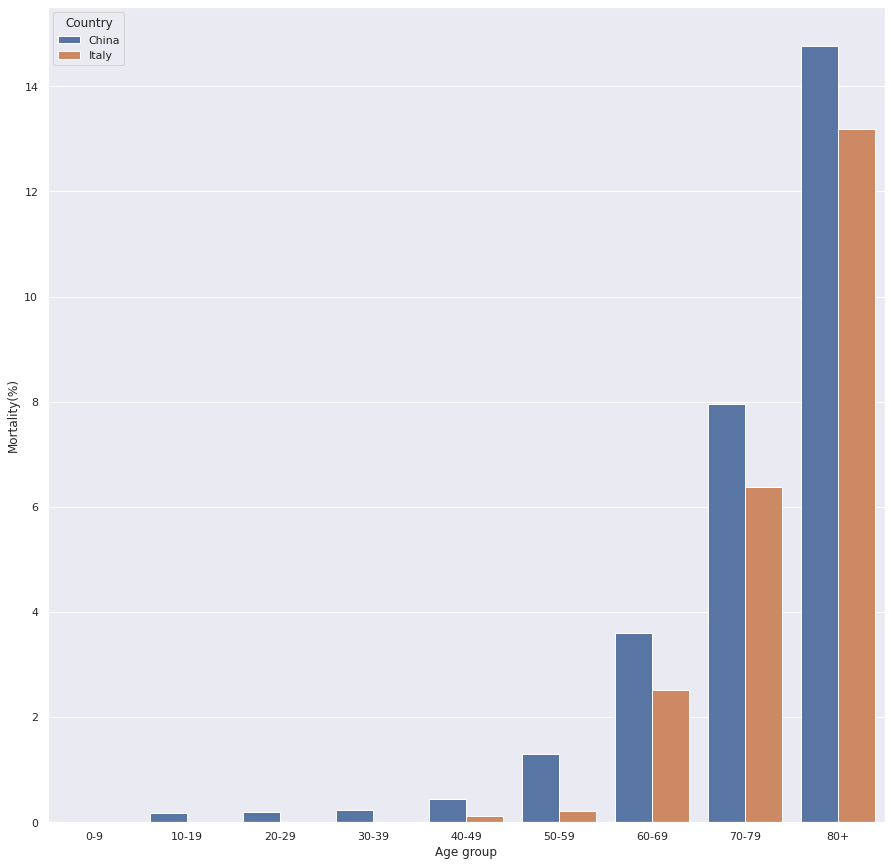

In [35]:
# Verificando comportamento por faixa etária
sns.barplot(data=covid,x='Age group',y='Mortality(%)',hue='Country')

Esse é um exemplo do paradoxo de Simposon já que considerando os dados agregados, a taxa de mortalidade da Itália é maior que a da China, mas considerando por faixa etária, para todas as faixas etárias, a da china é maior.